In [816]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ee
ee.Authenticate()
ee.Initialize(project='ee-salamovheyder')

In [817]:
incerc6=pd.read_csv('C:\\Users\\salam\\Downloads\\incerc6.csv')

In [818]:
incerc6=incerc6.drop('Unnamed: 0',axis=1)

In [819]:
incerc6.columns

Index(['longitude', 'latitude', 'red', 'green', 'blue', 'NIR', 'SWIR1',
       'SWIR2', 'aerosol', 'DEM', 'slope', 'water_content', 'carbon_density',
       'soil_temperature', 'air_temperature', 'surface_pressure',
       'total_evaporation', 'soil_moisture', 'CEC', 'sand_density',
       'clay_content', 'silt_content', 'pH', 'nitrogen_content',
       'precipitation', 'soil_texture_1.0', 'soil_texture_2.0',
       'soil_texture_4.0', 'soil_texture_5.0', 'soil_texture_6.0',
       'soil_texture_7.0', 'soil_texture_8.0', 'soil_texture_9.0',
       'soil_texture_11.0', 'soil_texture_12.0', 'LC0_Desc', 'LC1_Desc',
       'LU1_Desc', 'N', 'P', 'K', 'NDVI', 'NDWI', 'DVI', 'RVI', 'MSAVI', 'EVI',
       'ARVI', 'GNDVI', 'SWIR1/R', 'SWIR1/NIR', 'SWIR1/SWIR2', 'GSI', 'BSI1',
       'BSI2', 'RI', 'SUM', 'MIR', 'BI', 'Saturation', 'Coloration', 'SR',
       'SAVI', 'NIR/G', 'CVI', 'GLI', 'RECI', 'OSAVI', 'VARI', 'GCI', 'SIPI',
       'NDBI', 'MNDWI', 'STI', 'NDMI', 'climate_type'],
      dtype='

In [5]:
sequence=-1
longitude_df=[]
latitude_df=[]
band1=[]
band2=[]
band3=[]
band4=[]
band5=[]
band6=[]
band7=[]
soil_type=[]
DEM=[]
SLOPE=[]
ASPECT=[]
soil_texture=[]
bulk_density=[]
clay=[]
sand=[]
water=[]
organic_carbon=[]
pH=[]
taxonomy=[]
biome=[]

for lat in incerc6['latitude']:
    sequence=sequence+1
    longitude = incerc6['longitude'][sequence]
    latitude = lat
    end_date = ee.Date(str(incerc6['survey_date1'][sequence]))
    start_date = end_date.advance(-1, 'month')
    coordinates = ee.Geometry.Point([longitude, latitude])
    longitude_df.append(longitude)
    latitude_df.append(latitude)
    try:
        image = ee.ImageCollection('MODIS/061/MCD43A4') \
            .filterDate(start_date, end_date) \
            .filterBounds(coordinates).median()
        band1_value = image.select('Nadir_Reflectance_Band1').reduceRegion(reducer=ee.Reducer.median(),geometry=coordinates,scale=500).get('Nadir_Reflectance_Band1').getInfo()
        band2_value = image.select('Nadir_Reflectance_Band2').reduceRegion(reducer=ee.Reducer.median(),geometry=coordinates,scale=500).get('Nadir_Reflectance_Band2').getInfo()
        band3_value = image.select('Nadir_Reflectance_Band3').reduceRegion(reducer=ee.Reducer.median(),geometry=coordinates,scale=500).get('Nadir_Reflectance_Band3').getInfo()
        band4_value = image.select('Nadir_Reflectance_Band4').reduceRegion(reducer=ee.Reducer.median(),geometry=coordinates,scale=500).get('Nadir_Reflectance_Band4').getInfo()
        band5_value = image.select('Nadir_Reflectance_Band5').reduceRegion(reducer=ee.Reducer.median(),geometry=coordinates,scale=500).get('Nadir_Reflectance_Band5').getInfo()
        band6_value = image.select('Nadir_Reflectance_Band6').reduceRegion(reducer=ee.Reducer.median(),geometry=coordinates,scale=500).get('Nadir_Reflectance_Band6').getInfo()
        band7_value = image.select('Nadir_Reflectance_Band7').reduceRegion(reducer=ee.Reducer.median(),geometry=coordinates,scale=500).get('Nadir_Reflectance_Band7').getInfo()
        band1.append(band1_value)
        band2.append(band2_value)
        band3.append(band3_value)
        band4.append(band4_value)
        band5.append(band5_value)
        band6.append(band6_value)
        band7.append(band7_value)
    except:
        band1.append('No_value')
        band2.append('No_value')
        band3.append('No_value')
        band4.append('No_value')
        band5.append('No_value')
        band6.append('No_value')
        band7.append('No_value')
        print('MODIS: Exception ....')
    try:
        dem = ee.Image('USGS/SRTMGL1_003')
        slope = ee.Terrain.slope(dem)
        aspect = ee.Terrain.aspect(dem)
        dem_value = dem.reduceRegion(ee.Reducer.first(), coordinates, 30).get('elevation').getInfo()
        slope_value = slope.reduceRegion(ee.Reducer.first(), coordinates, 30).get('slope').getInfo()
        aspect_value = aspect.reduceRegion(ee.Reducer.first(), coordinates, 30).get('aspect').getInfo()
        DEM.append(dem_value)
        SLOPE.append(slope_value)
        ASPECT.append(aspect_value)
    except:
        DEM.append('No_value')
        SLOPE.append('No_value')
        ASPECT.append('No_value')
        print('DEM: Exception...')
    try:
        soil_texturee = ee.Image('OpenLandMap/SOL/SOL_TEXTURE-CLASS_USDA-TT_M/v02')
        soil_texture_class = soil_texturee.reduceRegion(reducer=ee.Reducer.median(),geometry=coordinates,scale=30).get('b0').getInfo()
        soil_texture.append(soil_texture_class)
    except:
        soil_texture.append('No_value')
        print('Soil Texture: Exception...')
    try:
        bulk_densityy = ee.Image('OpenLandMap/SOL/SOL_BULKDENS-FINEEARTH_USDA-4A1H_M/v02')
        bulk_density_value = bulk_densityy.reduceRegion(ee.Reducer.median(), coordinates, 250).get('b10').getInfo()
        bulk_density.append(bulk_density_value)
    except:
        bulk_density.append('No_value')
        print('Bulk density: Exception...')
    try:
        clay_contentt = ee.Image('OpenLandMap/SOL/SOL_CLAY-WFRACTION_USDA-3A1A1A_M/v02')
        clay_value = clay_contentt.reduceRegion(ee.Reducer.median(), coordinates, 250).get('b10').getInfo()
        clay.append(clay_value)
    except:
        clay.append('No_value')
        print('Clay: Exception...')
    try:
        sand_contentt = ee.Image('OpenLandMap/SOL/SOL_SAND-WFRACTION_USDA-3A1A1A_M/v02')
        sand_value = sand_contentt.reduceRegion(ee.Reducer.median(), coordinates, 250).get('b10').getInfo()
        sand.append(sand_value)
    except:
        sand.append('No_value')
        print('Sand: Exception...')
    try:
        water_contentt = ee.Image('OpenLandMap/SOL/SOL_WATERCONTENT-33KPA_USDA-4B1C_M/v01')
        water_value = water_contentt.reduceRegion(ee.Reducer.median(), coordinates, 250).get('b10').getInfo()
        water.append(water_value)
    except:
        water.append('No_value')
        print('Water content: Exception...')
    try:
        soil_organic_carbonn = ee.Image('OpenLandMap/SOL/SOL_CLAY-WFRACTION_USDA-3A1A1A_M/v02')
        soil_organic_carbon_value = soil_organic_carbonn.reduceRegion(ee.Reducer.median(), coordinates, 250).get('b10').getInfo()
        organic_carbon.append(soil_organic_carbon_value)
    except:
        organic_carbon.append('No_value')
        print('Organic_carbon: Exception...')
    try:
        pHH = ee.Image('OpenLandMap/SOL/SOL_PH-H2O_USDA-4C1A2A_M/v02')
        pH_value = pHH.reduceRegion(ee.Reducer.median(), coordinates, 250).get('b10').getInfo()
        pH.append(pH_value)
    except:
        pH.append('No_value')
        print('pH: Exception...')
    try:
        taxonomyy = ee.Image('OpenLandMap/SOL/SOL_GRTGROUP_USDA-SOILTAX_C/v01')
        taxonomy_value = taxonomyy.reduceRegion(ee.Reducer.median(), coordinates, 250).get('grtgroup').getInfo()
        taxonomy.append(taxonomy_value)
    except:
        taxonomy.append('No_value')
        print('Taxonomy: Exception...')
    try:
        biomee = ee.Image('OpenLandMap/PNV/PNV_BIOME-TYPE_BIOME00K_C/v01')
        biome_value = biomee.reduceRegion(ee.Reducer.median(), coordinates, 250).get('biome_type').getInfo()
        biome.append(biome_value)
    except:
        biome.append('No_value')
        print('Biome: Exception...')
    print(sequence,band2_value,taxonomy_value,dem_value,biome_value,pH_value,soil_organic_carbon_value,water_value,clay_value,soil_texture_class)
    

    
    




0 3318 216 266 9 66 26 32 26 7
1 3944 18 232 9 71 26 27 26 7
2 4035 18 276 9 72 26 29 26 7
3 3391 289 132 9 74 24 28 24 8
4 2555 303 116 9 73 17 29 17 7
5 2854 290 132 9 73 26 31 26 7
6 3082.5 303 112 9 76 27 33 27 7
7 3728 247 344 9 63 21 32 21 8
8 3475 18 267 9 56 29 32 29 4
9 3404 18 362 9 62 21 33 21 8
10 3690.5 357 470 9 56 27 35 27 7
11 3636 247 632 9 55 16 28 16 7
12 3820 247 706 9 58 15 27 15 9
13 3108 74 709 9 56 13 25 13 7
14 2966 18 625 9 54 16 27 16 7
15 2389.5 357 571 9 53 13 29 13 7
16 2630 74 639 9 47 12 29 12 9
17 3737 18 538 9 63 16 30 16 7
18 3206 18 264 9 68 23 29 23 7
19 3696 303 173 9 77 32 30 32 4
20 3031.5 17 287 9 72 25 28 25 7
21 3777 289 186 9 77 26 30 26 7
22 3729 216 277 9 75 26 31 26 8
23 3522 216 546 9 53 16 31 16 7
24 3078 291 181 9 75 24 28 24 7
25 3687 18 286 9 71 26 28 26 8
26 3153 18 244 9 75 23 29 23 8
27 3017 291 211 9 73 29 29 29 4
28 3935.5 290 174 9 72 24 29 24 7
29 3195 303 150 9 76 22 28 22 7
30 3617 271 151 9 72 23 27 23 7
31 4100 357 536 9 53

In [37]:
modis={'longitude':longitude_df,'latitude':latitude_df,'band1':band1,'band2':band2,'band3':band3,'band4':band4,'band5':band5,'band6':band6,'band7':band7,'DEM':DEM,'slope':SLOPE,'aspect':ASPECT,'soil_texture':soil_texture,'taxonomy':taxonomy,'bulk_density':bulk_density,'clay':clay,'sand':sand,'water':water,'organic_carbon':organic_carbon,'pH':pH,'biome':biome}
modis=pd.DataFrame(modis)
modis.to_csv('C:\\Users\\salam\\Downloads\\modis.csv')

In [824]:
modis=pd.read_csv('C:\\Users\\salam\\Downloads\\modis.csv')

In [ ]:
sequence=-1
longitude_df=[]
latitude_df=[]
modification=[]
AEZ=[]
product=[]
classification=[]
country=[]
crop=[]
climate=[]

for lat in incerc6['latitude']:
    sequence=sequence+1
    longitude = incerc6['longitude'][sequence]
    latitude = lat
    coordinates = ee.Geometry.Point([np.round(longitude,3), np.round(latitude,3)])
    longitude_df.append(longitude)
    latitude_df.append(latitude)
    try:
        image = ee.ImageCollection('CSP/HM/GlobalHumanModification') \
            .filterBounds(coordinates).median()

# Sample the NIR band value at the specific point.
        human_modification = image.select('gHM').reduceRegion(
        reducer=ee.Reducer.median(),
        geometry=coordinates,
        scale=1000
        ).get('gHM').getInfo()

        modification.append(human_modification)

    except:
        modification.append('No_value')
        print('Modification: Exception...')
    try:
        aez = ee.FeatureCollection("ESA/WorldCereal/AEZ/v100")
        aez_info = aez.filterBounds(coordinates).first().get('aez_id').getInfo()
        AEZ.append(aez_info)
    except:
        AEZ.append('No_value')
        print('Crop type: Exception...')
    try:
        countries = ee.FeatureCollection("FAO/GAUL/2015/level0")
        countryy = countries.filterBounds(coordinates).first()
        country_name = countryy.get('ADM0_NAME').getInfo()
        country.append(country_name)
    except:
        print('Country: Exception...')
        country.append('No_value')

    try:
        soil_moisturee = ee.ImageCollection('GOOGLE/DYNAMICWORLD/V1').filterDate('2016-01-01', '2018-01-01').filterBounds(coordinates).mean()
        crop_probability = soil_moisturee.reduceRegion(reducer=ee.Reducer.median(),geometry=coordinates,scale=100).get('crops').getInfo()
        crop.append(crop_probability)
    except:
        crop.append('No_value')
        print('Crop: Exception...')        
    print(sequence,aez_info,country_name,crop_probability,human_modification)/.
    

    
    




In [672]:
geounits=pd.read_csv('C:\\Users\\salam\\Downloads\\geounits.csv')

In [674]:
incerc6=incerc6.merge(geounits,on=['longitude','latitude'],how='inner')
incerc6=incerc6.merge(modis,on=['longitude','latitude'],how='inner')

In [676]:
incerc6=incerc6.dropna()

In [678]:
incerc6['P'].max()

60.6

In [680]:
len(incerc6)

3246

In [682]:
incerc6.columns

Index(['longitude', 'latitude', 'red', 'green', 'blue', 'NIR', 'SWIR1',
       'SWIR2', 'aerosol', 'DEM_x',
       ...
       'aspect', 'soil_texture', 'taxonomy', 'bulk_density', 'clay', 'sand',
       'water', 'organic_carbon', 'pH_y', 'biome'],
      dtype='object', length=101)

In [214]:
incerc6['NIR']=np.log10(1/incerc6['NIR'])
incerc6['red']=np.log10(1/incerc6['red'])
incerc6['green']=np.log10(1/incerc6['green'])
incerc6['blue']=np.log10(1/incerc6['blue'])
incerc6['SWIR1']=np.log10(1/incerc6['SWIR1'])
incerc6['SWIR2']=np.log10(1/incerc6['SWIR2'])

In [216]:
def detect_outliers(data, threshold=2.0):
    mean = np.mean(data)
    std = np.std(data)
    t_scores = (data - mean) / std
    outliers = np.abs(t_scores) > threshold
    return outliers

# Detect outliers in the 'NIR' column
outliers1 = detect_outliers(incerc6['NIR'], threshold=2.5)
outliers2 = detect_outliers(incerc6['red'], threshold=2.5)
outliers3 = detect_outliers(incerc6['green'], threshold=2.5)
outliers4 = detect_outliers(incerc6['blue'], threshold=2.5)
outliers5 = detect_outliers(incerc6['SWIR1'], threshold=2.5)
outliers6 = detect_outliers(incerc6['SWIR2'], threshold=2.5)
# Remove outliers
incerc6 = incerc6[~outliers1]
incerc6 = incerc6[~outliers2]
incerc6 = incerc6[~outliers3]
incerc6 = incerc6[~outliers4]
incerc6 = incerc6[~outliers5]
incerc6 = incerc6[~outliers6]



C:\Users\salam\AppData\Local\Temp\ipykernel_54524\1309060449.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  incerc6 = incerc6[~outliers2]
C:\Users\salam\AppData\Local\Temp\ipykernel_54524\1309060449.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  incerc6 = incerc6[~outliers3]
C:\Users\salam\AppData\Local\Temp\ipykernel_54524\1309060449.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  incerc6 = incerc6[~outliers4]
C:\Users\salam\AppData\Local\Temp\ipykernel_54524\1309060449.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  incerc6 = incerc6[~outliers5]
C:\Users\salam\AppData\Local\Temp\ipykernel_54524\1309060449.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  incerc6 = incerc6[~outliers6]


In [218]:
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter

def apply_derivative_treatment(data, order, gap, smooth1, smooth2):
    # Ensure polyorder is less than window_length
    polyorder = 2
    if smooth1 <= polyorder:
        smooth1 = polyorder + 1
    if smooth2 <= polyorder:
        smooth2 = polyorder + 1

    # Apply Savitzky-Golay filter for smoothing and derivative
    smoothed_data = savgol_filter(data, smooth1, polyorder=polyorder)
    derivative_data = np.gradient(smoothed_data, gap)
    final_smoothed_data = savgol_filter(derivative_data, smooth2, polyorder=polyorder)
    return final_smoothed_data

incerc6['NIR'] = apply_derivative_treatment(incerc6['NIR'], order=1, gap=16, smooth1=16, smooth2=1)
incerc6['red'] = apply_derivative_treatment(incerc6['red'], order=1, gap=16, smooth1=16, smooth2=1)
incerc6['green'] = apply_derivative_treatment(incerc6['green'], order=1, gap=16, smooth1=16, smooth2=1)
incerc6['blue'] = apply_derivative_treatment(incerc6['blue'], order=1, gap=16, smooth1=16, smooth2=1)
incerc6['SWIR1'] = apply_derivative_treatment(incerc6['SWIR1'], order=1, gap=16, smooth1=16, smooth2=1)
incerc6['SWIR2'] = apply_derivative_treatment(incerc6['SWIR2'], order=1, gap=16, smooth1=16, smooth2=1)



In [220]:
def apply_snvd(data):
    mean = np.mean(data)
    std = np.std(data)
    snvd_data = (data - mean) / std
    return snvd_data
incerc6['NIR'] = apply_snvd(incerc6['NIR'])
incerc6['red'] = apply_snvd(incerc6['red'])
incerc6['blue'] = apply_snvd(incerc6['blue'])
incerc6['green'] = apply_snvd(incerc6['green'])
incerc6['SWIR1'] = apply_snvd(incerc6['SWIR1'])
incerc6['SWIR2'] = apply_snvd(incerc6['SWIR2'])


In [57]:
def calculate_whc(soil_moisture, clay_content, silt_content, sand_density):
    return soil_moisture * (clay_content + silt_content) / sand_density

def calculate_sfi(cec, pH, nitrogen_content, P, K, soil_moisture, soil_texture):
    return (cec + pH + nitrogen_content + P + K + soil_moisture + soil_texture) / 7

def calculate_sp(sand_density, clay_content, silt_content):
    return (1 - sand_density) * (clay_content + silt_content)

def calculate_sci(bulk_density, soil_texture):
    return bulk_density * soil_texture

def calculate_sti(sand_content, silt_content, clay_content):
    return (sand_content + silt_content + clay_content) / 3

In [254]:
incerc6['WHC'] = incerc6.apply(lambda row: calculate_whc(row['soil_moisture'], row['clay_content'], row['silt_content'], row['sand_density']), axis=1)
incerc6['SFI'] = incerc6.apply(lambda row: calculate_sfi(row['CEC'], row['pH'], row['nitrogen_content'], row['P'], row['K'], row['soil_moisture'], row['soil_texture']), axis=1)
incerc6['SP'] = incerc6.apply(lambda row: calculate_sp(row['sand_density'], row['clay_content'], row['silt_content']), axis=1)
incerc6['SCI'] = incerc6.apply(lambda row: calculate_sci(row['sand_density'], row['soil_texture']), axis=1)

KeyError: 'pH'

In [686]:
incerc6.columns[50:]

Index(['SWIR1/NIR', 'SWIR1/SWIR2', 'GSI', 'BSI1', 'BSI2', 'RI', 'SUM', 'MIR',
       'BI', 'Saturation', 'Coloration', 'SR', 'SAVI', 'NIR/G', 'CVI', 'GLI',
       'RECI', 'OSAVI', 'VARI', 'GCI', 'SIPI', 'NDBI', 'MNDWI', 'STI', 'NDMI',
       'climate_type', 'Unnamed: 0_x', 'human_modification', 'AEZ', 'country',
       'crop_probability', 'Unnamed: 0_y', 'band1', 'band2', 'band3', 'band4',
       'band5', 'band6', 'band7', 'DEM_y', 'slope_y', 'aspect', 'soil_texture',
       'taxonomy', 'bulk_density', 'clay', 'sand', 'water', 'organic_carbon',
       'pH_y', 'biome'],
      dtype='object')

In [315]:
dem_array = np.array(incerc6['DEM'])

# Calculate the gradient in x and y directions
# Since we don't have neighboring cells, we'll use a simple difference approach
grad_y = np.gradient(dem_array)
grad_x = np.gradient(dem_array)

# Calculate the aspect
aspect = np.arctan2(grad_y, -grad_x) * 180 / np.pi
aspect = (aspect + 360) % 360  # Convert to compass direction

# Add aspect to the dataframe
incerc6['aspect'] = aspect

In [317]:
# Function to categorize P values
def categorize_p(value):
    if value < 20:
        return 'Low'
    elif 20 <= value < 40:
        return 'Medium'
    else:
        return 'Very High'

# Apply the function to the P column
incerc6['P_category'] = incerc6['P'].apply(categorize_p)



In [688]:
incerc6.columns

Index(['longitude', 'latitude', 'red', 'green', 'blue', 'NIR', 'SWIR1',
       'SWIR2', 'aerosol', 'DEM_x',
       ...
       'aspect', 'soil_texture', 'taxonomy', 'bulk_density', 'clay', 'sand',
       'water', 'organic_carbon', 'pH_y', 'biome'],
      dtype='object', length=101)

In [690]:
upper_limit_P=np.median(incerc6['P'])+1.5*(np.quantile(incerc6['P'],0.75)-np.quantile(incerc6['P'],0.25))
lower_limit_P=np.median(incerc6['P'])-1.5*(np.quantile(incerc6['P'],0.75)-np.quantile(incerc6['P'],0.25))
incerc6=incerc6.drop(incerc6[incerc6['P']<lower_limit_P].index)
incerc6=incerc6.drop(incerc6[incerc6['P']>upper_limit_P].index)

In [696]:
incerc6.columns[50:]

Index(['SWIR1/NIR', 'SWIR1/SWIR2', 'GSI', 'BSI1', 'BSI2', 'RI', 'SUM', 'MIR',
       'BI', 'Saturation', 'Coloration', 'SR', 'SAVI', 'NIR/G', 'CVI', 'GLI',
       'RECI', 'OSAVI', 'VARI', 'GCI', 'SIPI', 'NDBI', 'MNDWI', 'STI', 'NDMI',
       'climate_type', 'Unnamed: 0_x', 'human_modification', 'AEZ', 'country',
       'crop_probability', 'Unnamed: 0_y', 'band1', 'band2', 'band3', 'band4',
       'band5', 'band6', 'band7', 'DEM_y', 'slope_y', 'aspect', 'soil_texture',
       'taxonomy', 'bulk_density', 'clay', 'sand', 'water', 'organic_carbon',
       'pH_y', 'biome'],
      dtype='object')

In [796]:
X=incerc6[['red', 'green', 'blue', 'NIR', 'SWIR1',
       'SWIR2', 'aerosol', 'water_content','bulk_density',
       'carbon_density', 'soil_temperature', 'air_temperature',
       'surface_pressure', 'total_evaporation', 'soil_moisture', 'CEC',
       'sand_density', 'clay_content', 'silt_content', 'pH_x',           
       'nitrogen_content', 'precipitation','NDVI', 'NDWI','organic_carbon',
       'DVI', 'RVI', 'MSAVI', 'EVI', 'ARVI', 'GNDVI', 'SWIR1/R','SWIR1/NIR', 'SWIR1/SWIR2', 'GSI', 'BSI1', 'BSI2', 'RI', 'SUM', 'MIR',
       'BI', 'Saturation', 'Coloration', 'SR', 'SAVI', 'NIR/G',
       'MNDWI', 'NDMI','human_modification','crop_probability', 'slope_y',
        'soil_texture_1.0','soil_texture_2.0', 'soil_texture_4.0', 'soil_texture_5.0',
       'soil_texture_6.0', 'soil_texture_7.0', 'soil_texture_8.0',
       'soil_texture_9.0', 'soil_texture_11.0', 'soil_texture_12.0',
       'LC0_Desc','climate_type','taxonomy']]

In [798]:
ss=StandardScaler()
X[['red', 'green', 'blue', 'NIR', 'SWIR1',
       'SWIR2', 'aerosol', 'water_content','bulk_density',
       'carbon_density', 'soil_temperature', 'air_temperature',
       'surface_pressure', 'total_evaporation', 'soil_moisture', 'CEC',
       'sand_density', 'clay_content', 'silt_content', 'pH_x',           
       'nitrogen_content', 'precipitation','NDVI', 'NDWI','organic_carbon',
       'DVI', 'RVI', 'MSAVI', 'EVI', 'ARVI', 'GNDVI', 'SWIR1/R','SWIR1/NIR', 'SWIR1/SWIR2', 'GSI', 'BSI1', 'BSI2', 'RI', 'SUM', 'MIR',
       'BI', 'Saturation', 'Coloration', 'SR', 'SAVI', 'NIR/G',
       'MNDWI', 'NDMI','human_modification','crop_probability', 'slope_y']]=ss.fit_transform(X[['red', 'green', 'blue', 'NIR', 'SWIR1',
       'SWIR2', 'aerosol', 'water_content','bulk_density',
       'carbon_density', 'soil_temperature', 'air_temperature',
       'surface_pressure', 'total_evaporation', 'soil_moisture', 'CEC',
       'sand_density', 'clay_content', 'silt_content', 'pH_x',           
       'nitrogen_content', 'precipitation','NDVI', 'NDWI','organic_carbon',
       'DVI', 'RVI', 'MSAVI', 'EVI', 'ARVI', 'GNDVI', 'SWIR1/R','SWIR1/NIR', 'SWIR1/SWIR2', 'GSI', 'BSI1', 'BSI2', 'RI', 'SUM', 'MIR',
       'BI', 'Saturation', 'Coloration', 'SR', 'SAVI', 'NIR/G',
       'MNDWI', 'NDMI','human_modification','crop_probability', 'slope_y']])

C:\Users\salam\AppData\Local\Temp\ipykernel_54524\466488508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['red', 'green', 'blue', 'NIR', 'SWIR1',


In [704]:
'N', 'P', 'K'

('N', 'P', 'K')

In [706]:
incerc6[['LC0_Desc', 'LU1_Desc']]

,LC0_Desc,LU1_Desc
0,Woodland,Forestry
2,Cropland,Agriculture (excluding fallow land and kitchen...
3,Cropland,Agriculture (excluding fallow land and kitchen...
4,Cropland,Agriculture (excluding fallow land and kitchen...
5,Cropland,Agriculture (excluding fallow land and kitchen...
...,...,...
3242,Cropland,Agriculture (excluding fallow land and kitchen...
3243,Cropland,Agriculture (excluding fallow land and kitchen...
3244,Grassland,Agriculture (excluding fallow land and kitchen...
3245,Grassland,Agriculture (excluding fallow land and kitchen...


In [800]:
X=pd.get_dummies(X,columns=['LC0_Desc','climate_type','taxonomy'])

In [802]:
y=incerc6['P']

In [597]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X)
mask = yhat != -1
X_cleaned = X[mask]
y_cleaned = y[mask]

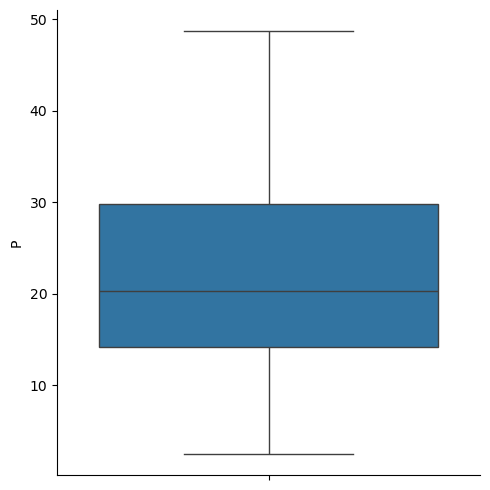

In [738]:
sns.catplot(data=y,kind='box')

In [601]:
X.columns[100:]

Index(['LC0_Desc_Woodland', 'taxonomy_1', 'taxonomy_4', 'taxonomy_6',
       'taxonomy_15', 'taxonomy_16', 'taxonomy_17', 'taxonomy_18',
       'taxonomy_19', 'taxonomy_26', 'taxonomy_27', 'taxonomy_31',
       'taxonomy_32', 'taxonomy_42', 'taxonomy_74', 'taxonomy_77',
       'taxonomy_92', 'taxonomy_93', 'taxonomy_94', 'taxonomy_110',
       'taxonomy_115', 'taxonomy_124', 'taxonomy_138', 'taxonomy_139',
       'taxonomy_140', 'taxonomy_141', 'taxonomy_142', 'taxonomy_144',
       'taxonomy_146', 'taxonomy_147', 'taxonomy_148', 'taxonomy_149',
       'taxonomy_207', 'taxonomy_216', 'taxonomy_218', 'taxonomy_220',
       'taxonomy_225', 'taxonomy_228', 'taxonomy_229', 'taxonomy_245',
       'taxonomy_246', 'taxonomy_247', 'taxonomy_250', 'taxonomy_251',
       'taxonomy_261', 'taxonomy_270', 'taxonomy_271', 'taxonomy_272',
       'taxonomy_273', 'taxonomy_278', 'taxonomy_285', 'taxonomy_289',
       'taxonomy_290', 'taxonomy_291', 'taxonomy_303', 'taxonomy_308',
       'taxonomy_313',

In [804]:
from sklearn.model_selection import train_test_split

In [806]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [808]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score
model=RandomForestRegressor(max_depth=3, min_samples_split=2, n_estimators=10)
model.fit(X_train,y_train)
X_hat=model.predict(X_train)
y_hat=model.predict(X_test)

In [810]:
print('mae_test: ',mean_absolute_error(y_test,y_hat),'mae_train: ',mean_absolute_error(y_train,X_hat),'r2_test: ',r2_score(y_test,y_hat),'r2_train: ',r2_score(y_train,X_hat))

mae_test:  7.8401503091658675 mae_train:  7.840165709124336 r2_test:  0.08563147599412768 r2_train:  0.14299053767210712


In [814]:
from xgboost import XGBRegressor
model=XGBRegressor(grow_policy='lossguide',max_depth=4, max_leaves= 4, n_estimators= 11)
model.fit(X_train,y_train)
y_hat=model.predict(X_test)
X_hat=model.predict(X_train)
print('mae_test: ',mean_absolute_error(y_test,y_hat),'mae_train: ',mean_absolute_error(y_train,X_hat),'r2_test: ',r2_score(y_test,y_hat),'r2_train: ',r2_score(y_train,X_hat))

mae_test:  7.7471103623929505 mae_train:  7.700419496135167 r2_test:  0.10801958083596597 r2_train:  0.16850410796410187


In [792]:
importance = model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Get the sorted list of feature names
sorted_features = feature_importance_df['Feature'].tolist()

In [794]:
sorted_features

['taxonomy_18',
 'crop_probability',
 'NIR',
 'nitrogen_content',
 'slope_y',
 'LC0_Desc_Woodland',
 'pH_x',
 'LC0_Desc_Cropland',
 'organic_carbon',
 'silt_content',
 'ARVI',
 'human_modification',
 'MNDWI',
 'air_temperature',
 'NDWI',
 'clay_content',
 'SWIR1/SWIR2',
 'NDMI',
 'taxonomy_142',
 'taxonomy_144',
 'taxonomy_146',
 'taxonomy_141',
 'taxonomy_147',
 'taxonomy_148',
 'taxonomy_149',
 'taxonomy_140',
 'taxonomy_139',
 'taxonomy_138',
 'red',
 'taxonomy_124',
 'taxonomy_115',
 'taxonomy_16',
 'taxonomy_17',
 'taxonomy_19',
 'taxonomy_26',
 'taxonomy_27',
 'taxonomy_31',
 'taxonomy_32',
 'taxonomy_42',
 'taxonomy_74',
 'taxonomy_77',
 'taxonomy_92',
 'taxonomy_93',
 'taxonomy_216',
 'taxonomy_94',
 'taxonomy_110',
 'taxonomy_207',
 'taxonomy_229',
 'taxonomy_218',
 'taxonomy_220',
 'taxonomy_303',
 'taxonomy_308',
 'taxonomy_313',
 'taxonomy_357',
 'taxonomy_367',
 'taxonomy_368',
 'taxonomy_374',
 'taxonomy_375',
 'taxonomy_377',
 'taxonomy_389',
 'taxonomy_391',
 'taxonomy_

In [501]:
print('mae_test: ',mean_absolute_error(y_test,y_hat),'mae_train: ',mean_absolute_error(y_train,X_hat))

mae_test:  7.6708574804302865 mae_train:  7.255900185299037


In [503]:
print('r2_test: ',r2_score(y_test,y_hat),'r2_train: ',r2_score(y_train,X_hat))

r2_test:  0.11787739744957959 r2_train:  0.2606820209088345


In [316]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [1,3,4,5,8,10,15,20],
    'max_depth': [1,2,3,4,5,8,10,15,20],
    'max_leaves':[1,3,4,5,6,8,10,15,20],
    'grow_policy':['lossguide','depthwise']
    
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'grow_policy': 'depthwise', 'max_depth': 2, 'max_leaves': 3, 'n_estimators': 20}


In [318]:
grid_search.best_score_

0.11651480505318637

In [485]:
y_test.max()

48.4

In [487]:
max(np.abs(y_test-y_hat))

28.11659049987793

(array([127., 115., 134.,  89.,  69.,  30.,  18.,  14.,   2.,   5.]),
 array([1.38641357e-02, 2.82413677e+00, 5.63440941e+00, 8.44468204e+00,
        1.12549547e+01, 1.40652273e+01, 1.68755000e+01, 1.96857726e+01,
        2.24960452e+01, 2.53063179e+01, 2.81165905e+01]),
 <BarContainer object of 10 artists>)

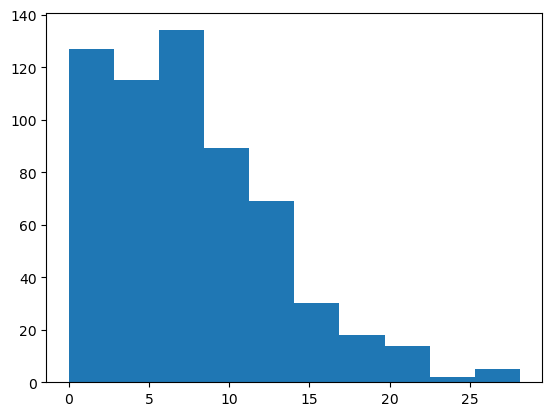

In [489]:
plt.hist(np.abs(y_test-y_hat))

(array([  7.,  57., 142., 102.,  99.,  59.,  43.,  43.,  25.,  26.]),
 array([ 2.8 ,  7.36, 11.92, 16.48, 21.04, 25.6 , 30.16, 34.72, 39.28,
        43.84, 48.4 ]),
 <BarContainer object of 10 artists>)

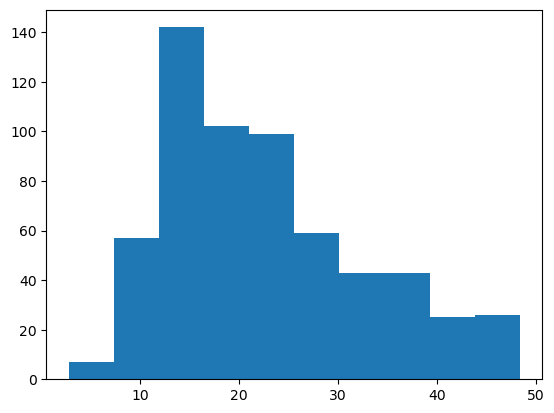

In [491]:
plt.hist(y_test)

(array([10., 29., 52., 62., 57., 87., 81., 74., 42., 34., 27., 16., 13.,
         6.,  5.,  4.,  1.,  1.,  1.,  1.]),
 array([15.14621353, 16.32810593, 17.50999832, 18.69189262, 19.87378502,
        21.05567741, 22.23756981, 23.4194622 , 24.60135651, 25.7832489 ,
        26.9651413 , 28.14703369, 29.32892609, 30.51082039, 31.69271278,
        32.87460327, 34.05649948, 35.23839188, 36.42028427, 37.60217667,
        38.78406906]),
 <BarContainer object of 20 artists>)

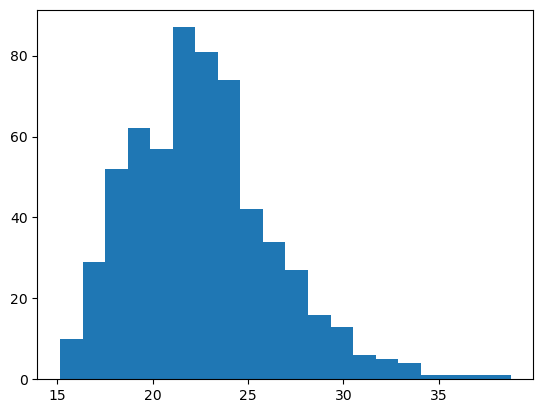

In [493]:
plt.hist(y_hat,bins=20)

In [1474]:
print(y_test['N'].min(),y_test['N'].max())

KeyError: 'N'

In [465]:
print(min(y_hat),max(y_hat))

1.3631375857358727 4.7932342932345


In [508]:
y_test

,N,P,K
348,2.2,11.6,154.7
2545,1.4,35.0,81.1
2448,1.7,40.8,197.8
313,1.2,41.5,253.3
2908,3.6,13.4,328.3
...,...,...,...
1128,1.1,18.7,196.7
539,1.3,29.6,121.1
148,1.7,18.4,208.6
34,3.0,12.0,153.9


In [253]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

# Ensure data types are correct
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.float32)
model = Sequential()
model = Sequential([
    Flatten(input_shape=(68,)),
    Dense(32, activation='sigmoid'),
    Dense(1, activation='relu')
])
# Compile the model
model.compile(optimizer='RMSprop', loss='mean_absolute_error')

# Train the model
model.fit(X_train, y_train, epochs=3, batch_size=500, validation_split=0.8)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

Epoch 1/3


C:\Users\salam\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_80" is incompatible with the layer: expected axis -1 of input shape to have value 68, but received input with shape (None, 57)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 57), dtype=float32)
  • training=True
  • mask=None

In [155]:
y_test


array([[-1.1379313 ],
       [-0.11048673],
       [-0.05380005],
       [-0.97495747],
       [ 2.3128655 ],
       [-0.08214346],
       [-1.1025023 ],
       [-1.0954164 ],
       [-1.1308455 ],
       [-0.4151772 ],
       [ 1.5759399 ],
       [-0.58523697],
       [-0.34431893],
       [-0.3230615 ],
       [-0.7765543 ],
       [-1.0245582 ],
       [ 1.6822273 ],
       [ 2.3978956 ],
       [ 1.859373  ],
       [ 0.73272645],
       [-0.56397957],
       [ 2.4120672 ],
       [-1.1308455 ],
       [-1.4638793 ],
       [ 0.17294629],
       [-0.54980785],
       [-0.86867005],
       [-0.8048976 ],
       [ 0.84609985],
       [-0.13174416],
       [-0.5781512 ],
       [-0.1246583 ],
       [-1.1450173 ],
       [ 1.4342234 ],
       [-1.0883306 ],
       [-0.79781175],
       [-0.13883   ],
       [-0.52855045],
       [-0.8332409 ],
       [-0.3868339 ],
       [-0.23094569],
       [ 2.341209  ],
       [-1.194618  ],
       [ 1.0161595 ],
       [ 0.13751717],
       [-0

In [157]:
y_pred[0][0]

0.1000071